In [372]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [373]:
df = pd.read_csv('faa_ai_prelim.csv')
print(df.columns.tolist(), "\n\n")
df.info()

['UPDATED', 'ENTRY_DATE', 'EVENT_LCL_DATE', 'EVENT_LCL_TIME', 'LOC_CITY_NAME', 'LOC_STATE_NAME', 'LOC_CNTRY_NAME', 'RMK_TEXT', 'EVENT_TYPE_DESC', 'FSDO_DESC', 'REGIST_NBR', 'FLT_NBR', 'ACFT_OPRTR', 'ACFT_MAKE_NAME', 'ACFT_MODEL_NAME', 'ACFT_MISSING_FLAG', 'ACFT_DMG_DESC', 'FLT_ACTIVITY', 'FLT_PHASE', 'FAR_PART', 'MAX_INJ_LVL', 'FATAL_FLAG', 'FLT_CRW_INJ_NONE', 'FLT_CRW_INJ_MINOR', 'FLT_CRW_INJ_SERIOUS', 'FLT_CRW_INJ_FATAL', 'FLT_CRW_INJ_UNK', 'CBN_CRW_INJ_NONE', 'CBN_CRW_INJ_MINOR', 'CBN_CRW_INJ_SERIOUS', 'CBN_CRW_INJ_FATAL', 'CBN_CRW_INJ_UNK', 'PAX_INJ_NONE', 'PAX_INJ_MINOR', 'PAX_INJ_SERIOUS', 'PAX_INJ_FATAL', 'PAX_INJ_UNK', 'GRND_INJ_NONE', 'GRND_INJ_MINOR', 'GRND_INJ_SERIOUS', 'GRND_INJ_FATAL', 'GRND_INJ_UNK'] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UPDATED              83 non-null     object 
 1   ENTRY_DATE     

In [374]:
df['EVENT_DATETIME'] = pd.to_datetime(
    df['EVENT_LCL_DATE'] + ' ' + df['EVENT_LCL_TIME'],
    format='%d-%b-%y %H:%M:%SZ',
    errors='coerce'
)

print(df['EVENT_DATETIME'].head(15), "\n\n")

df.drop(columns=['EVENT_LCL_DATE', 'EVENT_LCL_TIME'] ,  inplace=True)

df.sample(15)

0    2016-02-19 00:45:00
1    2016-02-18 23:55:00
2    2016-02-18 22:14:00
3    2016-02-18 17:10:00
4    2016-02-18 00:26:00
5    2016-02-18 20:23:00
6    2016-02-17 21:15:00
7    2016-02-17 18:10:00
8    2016-02-17 13:50:00
9    2016-02-17 15:30:00
10   2016-02-17 15:40:00
11   2016-02-15 16:12:00
12   2016-02-14 20:21:00
13   2016-02-14 02:00:00
14   2016-02-15 20:10:00
Name: EVENT_DATETIME, dtype: datetime64[ns] 




,UPDATED,ENTRY_DATE,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,REGIST_NBR,FLT_NBR,...,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK,EVENT_DATETIME
41,No,16-FEB-16,SANTA PAULA,California,NaN,"AIRCRAFT, N704SL CESSNA 150, AND N57BC AVIAT ...",Accident,FAA Van Nuys FSDO-01,N704SL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-12 23:00:00
70,No,08-FEB-16,CHESAPEAKE,Virginia,NaN,"AIRCRAFT ON TAXI, GEAR RETRACTED, CHESAPEAKE, VA",Incident,FAA Richmond FSDO-21,N261ER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-05 07:30:00
73,No,08-FEB-16,MONTEREY,California,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, MONT...",Incident,FAA San Jose FSDO-15,N6036G,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-05 20:54:00
21,No,17-FEB-16,BENCHLEY,Texas,NaN,AIRCRAFT FORCE LANDED IN A FIELD 2 MILES FROM ...,Accident,FAA Houston FSDO-09,N732FU,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-16 17:29:00
46,No,16-FEB-16,COSTA MESA,California,NaN,AIRCRAFT ON LANDING GROUND LOOPED AND GEAR COL...,Accident,FAA Long Beach FSDO-05,N161SA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-14 19:30:00
68,No,08-FEB-16,CRYSTAL RIVER,Florida,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLASPED, CRYS...",Incident,FAA Miami FSDO-19,N2015W,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-06 16:45:00
32,No,16-FEB-16,HOUSTON,Texas,NaN,"AIRCRAFT ON TAXI STRUCK A PARKED AIRCRAFT, WES...",Incident,FAA Houston FSDO-09,N50808,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-13 20:00:00
6,No,18-FEB-16,BROOKSVILLE,Florida,NaN,"AIRCRAFT GEAR COLLAPSED ON LANDING, BROOKSVILL...",Incident,FAA Miami FSDO-19,N7243P,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-17 21:15:00
3,No,19-FEB-16,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,N10CF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-18 17:10:00
65,No,09-FEB-16,GOLD BEACH,Oregon,NaN,AIRCRAFT ON LANDING WENT OFF THE RUNWAY INTO A...,Accident,FAA Portland FSDO-09,N6951E,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-08 18:58:00


In [375]:
req_cols = ['ACFT_MAKE_NAME', 'LOC_STATE_NAME', 'ACFT_MODEL_NAME', 'RMK_TEXT',
    'FLT_PHASE', 'EVENT_TYPE_DESC', 'FATAL_FLAG', 'ACFT_DMG_DESC']

new_df = df[req_cols].copy()

print("Extracted columns:\n", new_df.columns.tolist(),'\n\n')  
new_df.sample(15)


Extracted columns:
 ['ACFT_MAKE_NAME', 'LOC_STATE_NAME', 'ACFT_MODEL_NAME', 'RMK_TEXT', 'FLT_PHASE', 'EVENT_TYPE_DESC', 'FATAL_FLAG', 'ACFT_DMG_DESC'] 




,ACFT_MAKE_NAME,LOC_STATE_NAME,ACFT_MODEL_NAME,RMK_TEXT,FLT_PHASE,EVENT_TYPE_DESC,FATAL_FLAG,ACFT_DMG_DESC
36,MAULE,Alaska,M4,"AIRCRAFT ON TAKEOFF STRUCK A TAXIWAY SIGN, ANC...",TAKEOFF (TOF),Incident,NaN,Minor
81,BEECH,California,35,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",UNKNOWN (UNK),Accident,Yes,Destroyed
4,CESSNA,Alaska,172,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",LANDING (LDG),Incident,NaN,Minor
59,PIPER,Arizona,PA28,AIRCRAFT LANDED AND WENT OFF THE END OF THE RU...,LANDING (LDG),Incident,NaN,NaN
75,MOONEY,Maryland,M20K,"AIRCRAFT ON LANDING, STRUCK A SIGN AND RUNWAY ...",LANDING (LDG),Incident,NaN,Minor
52,CESSNA,Texas,182,AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES. ...,UNKNOWN (UNK),Accident,NaN,Substantial
79,NORTH AMERICAN,Arizona,F51,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",UNKNOWN (UNK),Accident,Yes,Destroyed
46,CHAMPION,California,8KCAB,AIRCRAFT ON LANDING GROUND LOOPED AND GEAR COL...,LANDING (LDG),Accident,NaN,Substantial
17,PIPER,Missouri,PA34,"AIRCRAFT ON LANDING GEAR COLLAPSED, SPRINGFIEL...",LANDING (LDG),Incident,NaN,Unknown
61,BEECH,California,36,AIRCRAFT FORCE LANDED IN THE WETLAND/SLOUGH AR...,LANDING (LDG),Accident,NaN,Substantial


In [376]:
new_df['FATAL_FLAG'] = new_df['FATAL_FLAG'].fillna('No')
new_df['FLT_PHASE'] = new_df['FLT_PHASE'].fillna(new_df['FLT_PHASE'].mode()[0])
new_df['ACFT_DMG_DESC'] = new_df['ACFT_DMG_DESC'].fillna(new_df['ACFT_DMG_DESC'].mode()[0])

print(new_df.isnull().sum())

ACFT_MAKE_NAME     5
LOC_STATE_NAME     0
ACFT_MODEL_NAME    4
RMK_TEXT           0
FLT_PHASE          0
EVENT_TYPE_DESC    0
FATAL_FLAG         0
ACFT_DMG_DESC      0
dtype: int64


In [377]:
initial_rows = len(df)
print(f"Initial number of rows: {initial_rows}")
df_cleaned = df.dropna(subset=['ACFT_MAKE_NAME'])
rows_dropped = initial_rows - len(df_cleaned)
print(f"Rows dropped due to missing 'ACFT_MAKE_NAME': {rows_dropped}")

Initial number of rows: 83
Rows dropped due to missing 'ACFT_MAKE_NAME': 5


In [378]:
required_columns = ['ACFT_MAKE_NAME', 'FATAL_FLAG', 'FLT_PHASE', 'ACFT_DMG_DESC']
print("Columns before dropping:", df_cleaned.shape[1])

cols_to_drop = df_cleaned.columns[df_cleaned.notna().sum() < 75]

cols_to_drop = [col for col in cols_to_drop if col not in required_columns]

df_cleaned = df_cleaned.drop(columns=cols_to_drop)

print("Final columns:", df_cleaned.columns.tolist())
print("Columns after dropping:", df_cleaned.shape[1])


Columns before dropping: 41
Final columns: ['UPDATED', 'ENTRY_DATE', 'LOC_CITY_NAME', 'LOC_STATE_NAME', 'RMK_TEXT', 'EVENT_TYPE_DESC', 'FSDO_DESC', 'REGIST_NBR', 'ACFT_MAKE_NAME', 'ACFT_MODEL_NAME', 'ACFT_DMG_DESC', 'FLT_PHASE', 'FATAL_FLAG', 'EVENT_DATETIME']
Columns after dropping: 14


In [379]:
aircraft_count = df_cleaned.groupby('ACFT_MAKE_NAME').size()
print("Aircraft counts:\n", aircraft_count.sort_values(ascending=False))


Aircraft counts:
 ACFT_MAKE_NAME
CESSNA                    23
PIPER                     10
BEECH                      9
MOONEY                     4
BOEING                     3
CHAMPION                   2
SOCATA                     2
LANCAIR                    2
BELL                       2
CHRISTEN                   1
AEROSTAR INTERNATIONAL     1
AIRBUS                     1
AERO COMMANDER             1
AERONCA                    1
FAIRCHILD                  1
ENSTROM                    1
EMBRAER                    1
CONSOLIDATED VULTEE        1
GRUMMAN                    1
FLIGHT DESIGN              1
GREAT LAKES                1
GLOBE                      1
MAULE                      1
HUGHES                     1
GULFSTREAM                 1
NORTH AMERICAN             1
PITTS                      1
SAAB                       1
SABRELINER                 1
VANS                       1
dtype: int64


In [380]:
fatal_events = df_cleaned[df_cleaned['FATAL_FLAG'].fillna('').str.upper() == 'YES']
fatal_events[['ACFT_MAKE_NAME', 'FATAL_FLAG', 'RMK_TEXT']].style.set_properties(**{
    'white-space': 'pre-wrap',
    'text-align': 'left'
})


,ACFT_MAKE_NAME,FATAL_FLAG,RMK_TEXT
0,BEECH,Yes,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON BOARD WAS FATALLY INJURED, NEAR MARSHVILLE, NC"
53,PIPER,Yes,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES. DESTIN, FL"
55,FLIGHT DESIGN,Yes,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES AND CAUGHT FIRE, THE 2 PERSONS ON BOARD WERE FATALLY INJURED, NEAR TULARE AIRPORT, TULARE, CA"
79,NORTH AMERICAN,Yes,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, THE 2 PERSONS ON BOARD WERE FATALLY INJURED, NEAR MARICOPA, AZ"
80,CHAMPION,Yes,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLANCE 8KCAB AIRCRAFT, COLLIDED MIDAIR OVER THE PACIFIC OCEAN OFF THE COAST, THE 2 PERSONS ON BOARD N9872R WERE FATALLY INJURED, THE 1 PERSON ON BOARD N5057G WAS FATALLY INJURED, WRECKAGE LOCATED OFF THE COAST NEAR SAN PEDRO, CA"
81,BEECH,Yes,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLANCE 8KCAB AIRCRAFT, COLLIDED MIDAIR OVER THE PACIFIC OCEAN OFF THE COAST, THE 2 PERSONS ON BOARD N9872R WERE FATALLY INJURED, THE 1 PERSON ON BOARD N5057G WAS FATALLY INJURED, WRECKAGE LOCATED OFF THE COAST NEAR SAN PEDRO, CA"
82,CESSNA,Yes,"N784CP AIRCRAFT CRASHED INTO A WOODED AREA NEAR THE AIRPORT, THE 2 PERSONS ON BOARD WERE FATALLY INJURED, MOBILE, AL UPDATE REGISTRATION N784CP,"


In [381]:
damage_dummies = pd.get_dummies(df_cleaned['ACFT_DMG_DESC'], prefix='DMG', drop_first=True)
print("Dummy columns created:", damage_dummies.columns.tolist(),'\n\n')

df_cleaned = pd.concat([df_cleaned, damage_dummies], axis=1)
df_cleaned.drop(columns=['ACFT_DMG_DESC'], inplace=True)
print(damage_dummies.columns.tolist(),'\n\n')
print("DataFrame after adding dummy variables using One-Hot encoding:")
df_cleaned.head(15)


Dummy columns created: ['DMG_Minor', 'DMG_Substantial', 'DMG_Unknown'] 


['DMG_Minor', 'DMG_Substantial', 'DMG_Unknown'] 


DataFrame after adding dummy variables using One-Hot encoding:


,UPDATED,ENTRY_DATE,LOC_CITY_NAME,LOC_STATE_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,REGIST_NBR,ACFT_MAKE_NAME,ACFT_MODEL_NAME,FLT_PHASE,FATAL_FLAG,EVENT_DATETIME,DMG_Minor,DMG_Substantial,DMG_Unknown
0,No,19-FEB-16,MARSHVILLE,North Carolina,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,N61WB,BEECH,36,UNKNOWN (UNK),Yes,2016-02-19 00:45:00,False,False,True
1,No,19-FEB-16,TAVERNIER,Florida,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,N705RP,VANS,RV7,LANDING (LDG),NaN,2016-02-18 23:55:00,False,False,True
2,No,19-FEB-16,TRENTON,New Jersey,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,N9563A,CESSNA,172,APPROACH (APR),NaN,2016-02-18 22:14:00,True,False,False
3,No,19-FEB-16,ASHEVILLE,North Carolina,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,N10CF,LANCAIR,235,LANDING (LDG),NaN,2016-02-18 17:10:00,False,False,True
4,No,19-FEB-16,TALKEETNA,Alaska,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,N1530Y,CESSNA,172,LANDING (LDG),NaN,2016-02-18 00:26:00,True,False,False
5,No,19-FEB-16,PEARL HARBOR,Hawaii,N80918 BELL 206B ROTORCRAFT CRASHED INTO THE W...,Accident,FAA Honolulu FSDO-13,N80918,BELL,206,UNKNOWN (UNK),NaN,2016-02-18 20:23:00,False,True,False
6,No,18-FEB-16,BROOKSVILLE,Florida,"AIRCRAFT GEAR COLLAPSED ON LANDING, BROOKSVILL...",Incident,FAA Miami FSDO-19,N7243P,PIPER,PA24,LANDING (LDG),NaN,2016-02-17 21:15:00,False,False,True
7,No,18-FEB-16,WINTER HAVEN,Florida,"AIRCRAFT ON LANDING GEAR COLLAPSED, WINTER HAV...",Incident,FAA Orlando FSDO-15,N9443M,CESSNA,210,LANDING (LDG),NaN,2016-02-17 18:10:00,False,False,True
8,No,18-FEB-16,MIAMI,Florida,N859GT ATLAS AIR FLIGHT GTI33 BOEING 747 AIRCR...,Incident,FAA Miami FSDO-19,N859GT,BOEING,747,TAKEOFF (TOF),NaN,2016-02-17 13:50:00,True,False,False
10,No,18-FEB-16,NEWPORT NEWS,Virginia,AIRCRAFT ON LANDING WENT OFF THE RUNWAY INTO A...,Incident,FAA Richmond FSDO-21,N35502,CESSNA,172,LANDING (LDG),NaN,2016-02-17 15:40:00,False,False,True


In [ ]:
df_cleaned['FLIGHT_PHASE_TEXT'] = (
    df_cleaned['RMK_TEXT']
    .fillna('')
    .str.upper()
    .str.extract(r'(LANDING|TAKEOFF|CRUISE|APPROACH)', expand=False)
    .fillna('UNKNOWN')
)


flt_phase_clean = df_cleaned['FLT_PHASE'].fillna('').str.upper().str.extract(r'([A-Z]+)', expand=False)


matches = flt_phase_clean == df_cleaned['FLIGHT_PHASE_TEXT']

print(f"\nExact matches : {matches.sum()}/{len(df_cleaned)} ({matches.mean():.2%})",'\n\n')

df_cleaned[['FLT_PHASE', 'FLIGHT_PHASE_TEXT']].sample(10)




Exact matches (normalized): 50/78 (64.10%) 




,FLT_PHASE,FLIGHT_PHASE_TEXT
5,UNKNOWN (UNK),UNKNOWN
60,APPROACH (APR),APPROACH
49,LANDING (LDG),LANDING
74,LANDING (LDG),LANDING
56,LANDING (LDG),LANDING
75,LANDING (LDG),LANDING
47,LANDING (LDG),UNKNOWN
80,UNKNOWN (UNK),UNKNOWN
25,LANDING (LDG),UNKNOWN
28,TAXI (TXI),UNKNOWN


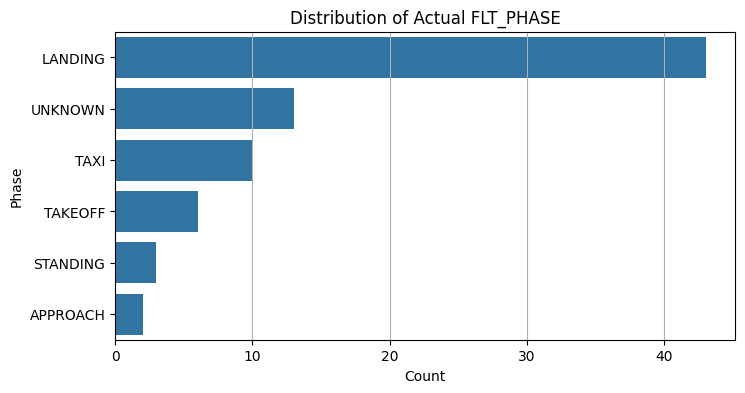

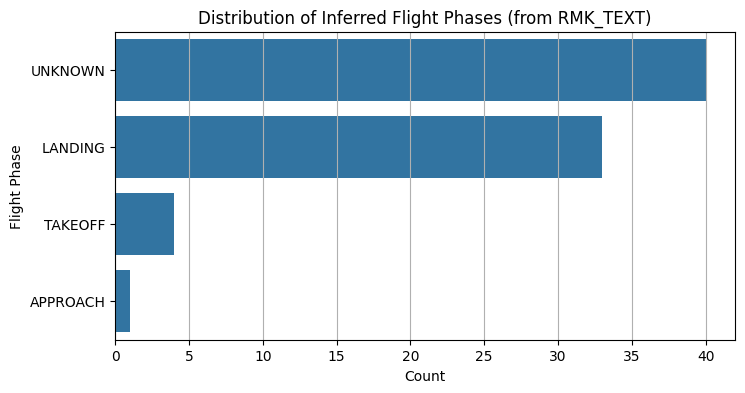

In [383]:
plt.figure(figsize=(8,4))
sns.countplot(y=flt_phase_clean, order=flt_phase_clean.value_counts().index)
plt.title("Distribution of Actual FLT_PHASE")
plt.xlabel("Count")
plt.ylabel("Phase")
plt.grid(axis='x')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(
    y='FLIGHT_PHASE_TEXT',
    data=df_cleaned,
    order=df_cleaned['FLIGHT_PHASE_TEXT'].value_counts().index
)
plt.title("Distribution of Inferred Flight Phases (from RMK_TEXT)")
plt.xlabel("Count")
plt.ylabel("Flight Phase")
plt.grid(axis='x')
plt.show()